In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
plt.rcParams['date.converter'] = 'concise'


## Data source:
https://www.ncei.noaa.gov/pub/data/uscrn/products/hourly02/


```
Field#  Name                           Units
---------------------------------------------
   1    WBANNO                         XXXXX
   2    UTC_DATE                       YYYYMMDD
   3    UTC_TIME                       HHmm
   4    LST_DATE                       YYYYMMDD
   5    LST_TIME                       HHmm
   6    CRX_VN                         XXXXXX
   7    LONGITUDE                      Decimal_degrees
   8    LATITUDE                       Decimal_degrees
   9    T_CALC                         Celsius
   10   T_HR_AVG                       Celsius
   11   T_MAX                          Celsius
   12   T_MIN                          Celsius
   13   P_CALC                         mm
   14   SOLARAD                        W/m^2
   15   SOLARAD_FLAG                   X
   16   SOLARAD_MAX                    W/m^2
   17   SOLARAD_MAX_FLAG               X
   18   SOLARAD_MIN                    W/m^2
   19   SOLARAD_MIN_FLAG               X
   20   SUR_TEMP_TYPE                  X
   21   SUR_TEMP                       Celsius
   22   SUR_TEMP_FLAG                  X
   23   SUR_TEMP_MAX                   Celsius
   24   SUR_TEMP_MAX_FLAG              X
   25   SUR_TEMP_MIN                   Celsius
   26   SUR_TEMP_MIN_FLAG              X
   27   RH_HR_AVG                      %
   28   RH_HR_AVG_FLAG                 X
   29   SOIL_MOISTURE_5                m^3/m^3
   30   SOIL_MOISTURE_10               m^3/m^3
   31   SOIL_MOISTURE_20               m^3/m^3
   32   SOIL_MOISTURE_50               m^3/m^3
   33   SOIL_MOISTURE_100              m^3/m^3
   34   SOIL_TEMP_5                    Celsius
   35   SOIL_TEMP_10                   Celsius
   36   SOIL_TEMP_20                   Celsius
   37   SOIL_TEMP_50                   Celsius
   38   SOIL_TEMP_100                  Celsius
 ```

Text(0.5, 1.0, 'Dinosaur, Colorado')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
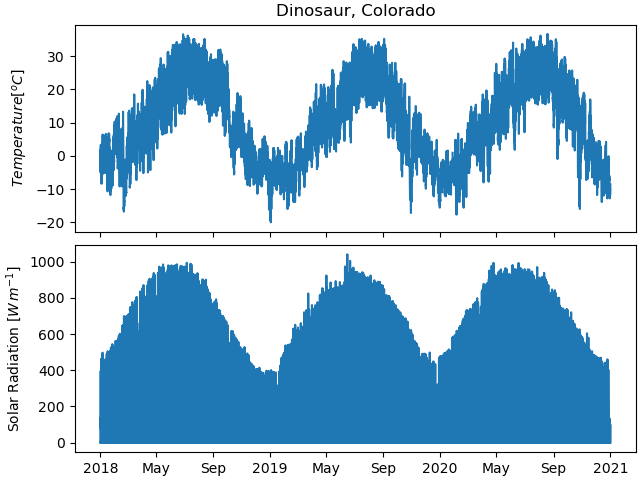

In [2]:
data = np.genfromtxt('data/all.txt')
date = data[:, 1]
time = data[:, 2]
datetime = []
for d, t in zip(date, time):
    st = f'{int(d):08d}T{int(t):04d}'
    st = st[:-2] + ':' + st[-2:]
    st = st[:4] + '-' + st[4:6] + '-' + st[6:]
    datetime += [np.datetime64(st)] 
datetime = np.asarray(datetime)
temp = data[:, 9]
temperature = np.where(temp>-1000, temp, np.NaN)

solar = data[:, 13]
solar = np.where(solar>-1000, solar, np.NaN)


fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, constrained_layout=True)
ax0.plot(datetime, temperature)

ax0.set_ylabel('$Temperature [^oC]$')

ax1.plot(datetime, solar)

ax1.set_ylabel('Solar Radiation $[W\,m^{-1}]$')

ax0.set_title('Dinosaur, Colorado')



float64
[4.16666667e-02 8.33333333e-02 1.25000000e-01 ... 1.09591667e+03
 1.09595833e+03 1.09600000e+03]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
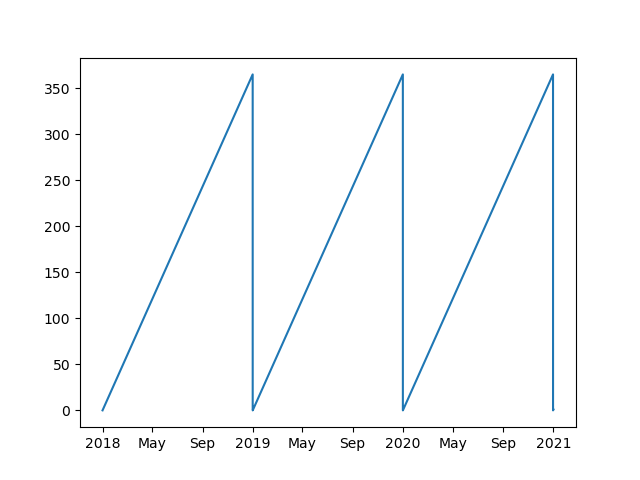

In [3]:
# Make day of the year
days = (datetime - np.datetime64('2018-01-01', 'D')).astype(np.float64) / 60 / 24
print(days.dtype)
print(days)
days = np.mod(days, 365)
fig, ax = plt.subplots()
ax.plot(datetime, days)

In [4]:
with open('data/small.txt', 'w') as fout:
    fout.write('# Extracted from CRNH0203-2018-CO_Dinosaur_2_E.txt from https://www.ncei.noaa.gov/pub/data/uscrn/products/hourly02/ \n')
    fout.write('# datetime / day of year / temperature [deg C] / solar radiation [W/m^2] \n')

    for date, d, t, s in zip(datetime, days, temperature, solar):
        fout.write(f'{date} {d:8.3f} {t:6.1f} {s:9.1f}\n')

## preprocess image data

https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MOD_LSTD_E&date=2021-09-01

In [5]:
a = 10

In [6]:
dat = np.genfromtxt('data/MOD_LSTD_E_2021-08-29_gs_720x360.CSV', delimiter=',')
dat = np.where(dat<1000, dat, np.NaN)
dat = dat[::-1, :]
lon = np.arange(0, 360, 0.5)
lat = np.arange(-90, 90, 0.5)


/var/folders/vy/zxjl84j90ws6d1k09_rhst0w0000gp/T/ipykernel_61351/1084180396.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(lon, lat, dat)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
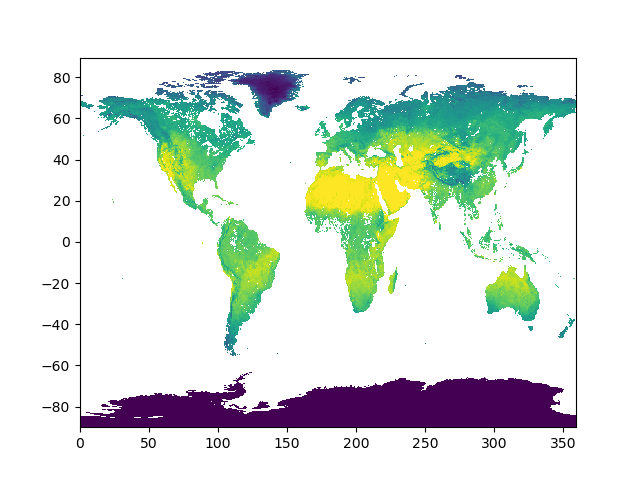

In [7]:
fig, ax = plt.subplots()
ax.pcolormesh(lon, lat, dat)